In [1]:
import numpy as np
import torch
from torch import nn
import torch.nn.functional as F

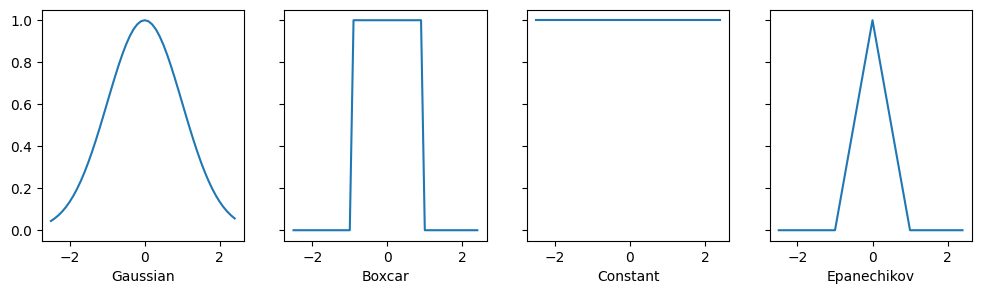

In [4]:
import matplotlib.pyplot as plt


def gaussion(x):
    return torch.exp(-x**2/2)


def boxcar(x):
    return torch.abs(x) < 1.0


def constant(x):
    return 1.0 + 0 * x


def epanechikov(x):
    return torch.max(1-torch.abs(x), torch.zeros_like(x))


fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 3))

kernels = (gaussion, boxcar, constant, epanechikov)
names = ('Gaussian', 'Boxcar', 'Constant', 'Epanechikov')
x = torch.arange(-2.5, 2.5, 0.1)
for kernal, name, ax in zip(kernels, names, axes):
    ax.plot(x.detach().numpy(), kernal(x).detach().numpy())
    ax.set_xlabel(name)
plt.show()

In [9]:
# Create a tensor of shape (3, 4)
tensor = torch.tensor([[3, 2, 1, 4], [5, 6, 8, 7], [9, 10, 11, 12]])

# Sort the tensor along the second dimension in descending order
sorted_tensor, indices = torch.sort(tensor, dim=1, descending=True)

# Print the sorted tensor and indices
print(sorted_tensor)
print(indices)

torch.gather(tensor, dim=1, index=indices)

tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])
tensor([[3, 0, 1, 2],
        [2, 3, 1, 0],
        [3, 2, 1, 0]])


tensor([[ 4,  3,  2,  1],
        [ 8,  7,  6,  5],
        [12, 11, 10,  9]])

In [10]:
def f(x):
    return 2 * torch.sin(x) + x


n = 40
x_train, _ = torch.sort(torch.rand(40)*5)
y_train = f(x_train)+torch.randn(n)
x_val = torch.arange(0, 5, 0.1)
y_val = f(x_val)

In [11]:
def nadaraya_watson(x_train, y_train, x_val, kernel):
    dists = x_train.view(-1, 1) - x_val.view(1, -1)
    k = kernal(dists).type(torch.float32)
    attention_w = k / k.sum(0)
    y_hat = y_train@attention_w
    return y_hat, attention_w

In [28]:
def plot(x_train, y_train, x_val, y_val, kernels, names, attention=False):
    fig, axes = plt.subplots(1, 4, sharey=True, figsize=(12, 3))
    for kernel, name, ax in zip(kernels, names, axes):
        y_hat, attention_w = nadaraya_watson(x_train, y_train, x_val, kernel)
        if attention:
            pcm = ax.imshow(attention_w.detach().numpy(), cmap='Reds')
        else:
            ax.plot(x_val, y_hat)
            ax.plot(x_val, y_val, 'm--')
            ax.plot(x_train, y_train, 'o', alpha=0.5)
        ax.set_xlabel(name)
        if not attention:
            ax.legend(['y_hat', 'y'])
    if attention:
        fig.colorbar(pcm, ax=axes, shrink=0.7)
        

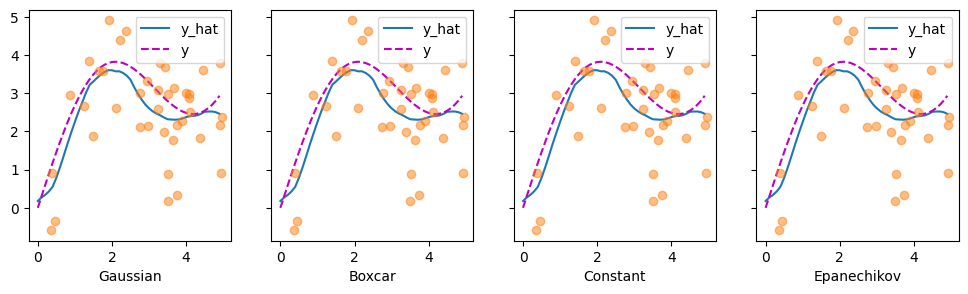

In [29]:
plot(x_train, y_train, x_val, y_val, kernels, names)

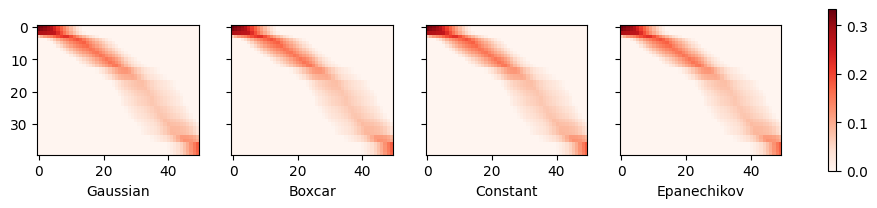

In [30]:
plot(x_train, y_train, x_val, y_val, kernels, names, attention=True)

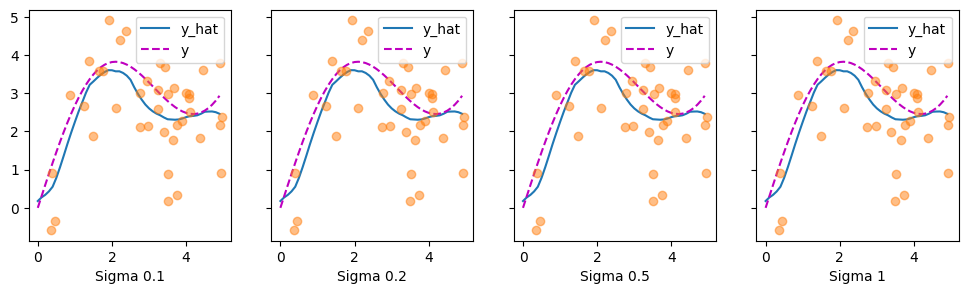

In [33]:
sigmas = [0.1, 0.2, 0.5, 1]
names = ['Sigma '+str(sigma) for sigma in sigmas]

def gaussion_with_width(sigma):
    return lambda x:torch.exp(-x**2/(2*sigma**2))

kernels = [gaussion_with_width(sigma) for sigma in sigmas]
plot(x_train, y_train, x_val, y_val, kernels, names)

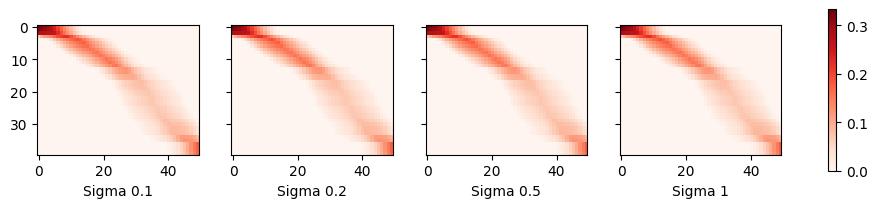

In [34]:
plot(x_train, y_train, x_val, y_val, kernels, names, True)